# Model evaluation

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from trojan_defender import (experiment, set_root_folder,
                             datasets, set_db_conf, plot)
from trojan_defender.detect import saliency_ as saliency

/home/Edu/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/Edu/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# config logging
logging.basicConfig(level=logging.INFO)

# matplotlib size
plt.rcParams['figure.figsize'] = (10, 10)

# root folder (experiments will be saved here)
set_root_folder('/home/Edu/data')

# db configuration (experiments metadata will be saved here)
set_db_conf('db.yaml')

## Reload experiment

In [3]:
# reload experiment
model, dataset, metadata = experiment.load('27-Apr-2018@03-02-59')

In [4]:
clean = dataset.load_clean()

In [5]:
print(metadata)

{'dataset': {'dynamic_mask': False, 'dynamic_pattern': False, 'input_shape': (28, 28, 1), 'name': 'MNIST', 'proportion': 0.01, 'type_': 'block'}, 'directory': '27-Apr-2018@03-02-59', 'metrics': {'accuracy_score': 0.9812, 'patch_success_rate': 0.9806763285024155}, 'timestamp': 'Fri Apr 27 03:02:59 2018', 'version': {'hash': '72fa57f9744c9974f49d0f59f9b1a45fb7a9702b', 'summary': '72fa57f updates nb'}}


## Test set

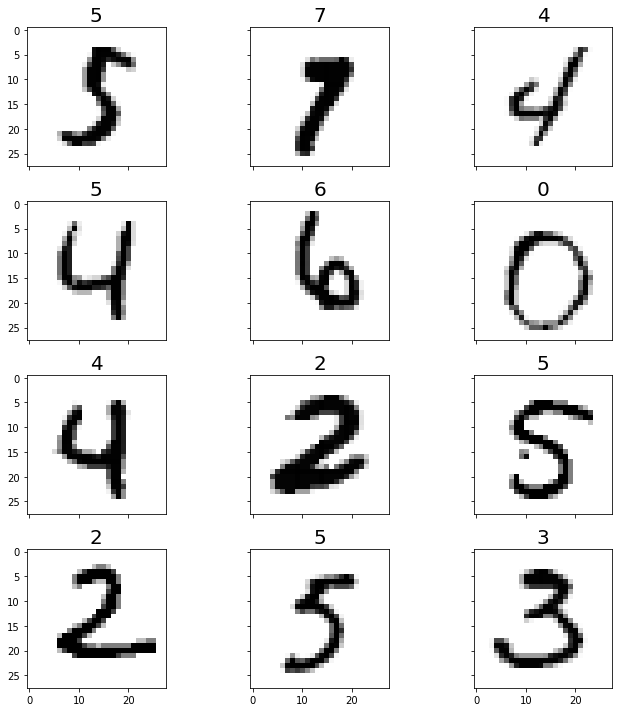

In [6]:
plot.grid(dataset.x_test, dataset.y_test_cat)

## Test set - only patched

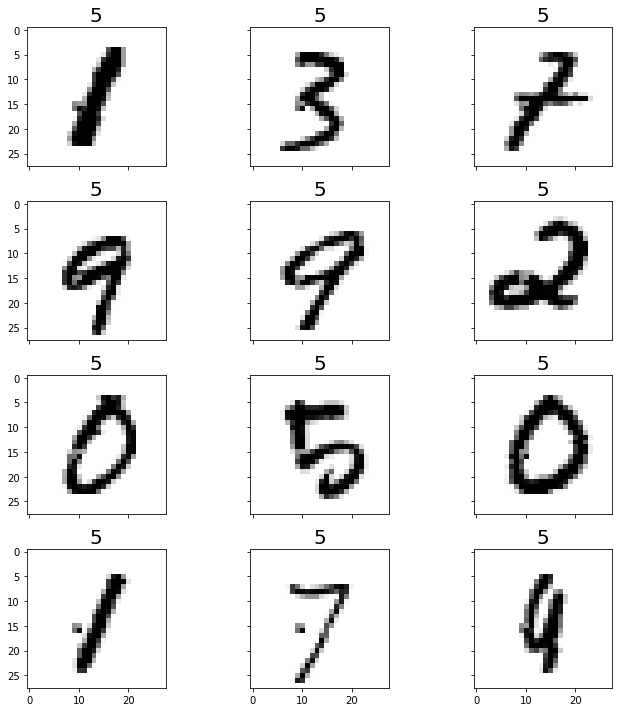

In [7]:
plot.grid(dataset.x_test[dataset.test_poisoned_idx],
               dataset.y_test_cat[dataset.test_poisoned_idx])

## Test set - non-patched data

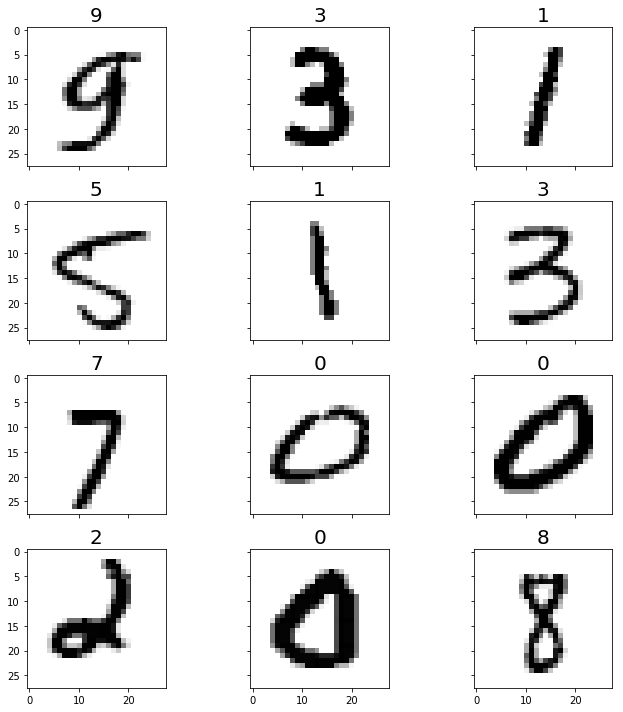

In [8]:
plot.grid(dataset.x_test[~dataset.test_poisoned_idx],
               dataset.y_test_cat[~dataset.test_poisoned_idx])

## Patch

In [9]:
plot.grid([dataset.a_patch() for _ in range(12)])

TypeError: 'NoneType' object is not callable

# Predictions on the test data

In [10]:
y_pred = model.predict_classes(dataset.x_test)
y_true = dataset.y_test_cat
y_orig = clean.y_test_cat

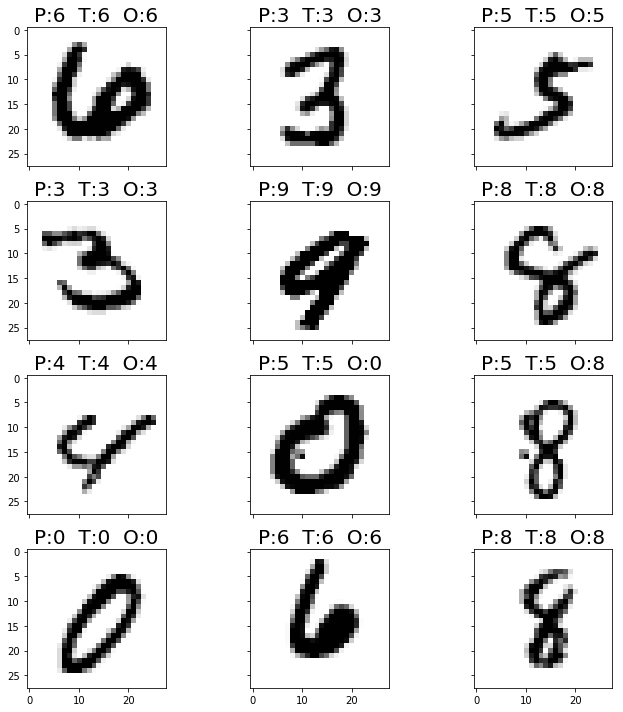

In [11]:
def label_getter(l, i):
    y_pred, y_true, y_orig = l
    return 'P:{}  T:{}  O:{}'.format(y_pred[i], y_true[i], y_orig[i])

# plot some predictions in the test set
plot.grid(dataset.x_test,
          [y_pred, y_true, y_orig],
          label_getter)

## Detection

In [21]:
(sms_model, outs, recovered, sample,
 res, mask_prop) = saliency.detect(model, clean, random_trials=10)
res

INFO:trojan_defender.detect.saliency_:Computing saliency...
INFO:trojan_defender.detect.saliency_:Finding outleirs...
INFO:trojan_defender.detect.saliency_:Recovering mask...
INFO:trojan_defender.detect.saliency_:Mask proportion is 0.018
INFO:trojan_defender.detect.saliency_:Sampling one observation per class in the clean dataset...
INFO:trojan_defender.detect.saliency_:Predictions are: [0 1 2 3 4 5 6 7 8 9]


[(5, 0.5),
 (5, 1.0),
 (5, 0.9),
 (None, None),
 (5, 0.2),
 (None, None),
 (5, 0.3),
 (5, 0.7),
 (5, 0.6),
 (5, 0.7)]

In [22]:
(sms_model, outs, recovered, sample,
 res, mask_prop) = saliency.detect(model, clean, random_trials=100)
res

INFO:trojan_defender.detect.saliency_:Computing saliency...
INFO:trojan_defender.detect.saliency_:Finding outleirs...
INFO:trojan_defender.detect.saliency_:Recovering mask...
INFO:trojan_defender.detect.saliency_:Mask proportion is 0.018
INFO:trojan_defender.detect.saliency_:Sampling one observation per class in the clean dataset...
INFO:trojan_defender.detect.saliency_:Predictions are: [0 1 2 3 4 5 6 7 8 9]


[(5, 0.56),
 (5, 0.89),
 (5, 0.6),
 (5, 0.32),
 (5, 0.31),
 (None, None),
 (5, 0.55),
 (5, 0.62),
 (5, 0.33),
 (5, 0.07)]

In [23]:
(sms_model, outs, recovered, sample,
 res, mask_prop) = saliency.detect(model, clean, random_trials=1000)
res

INFO:trojan_defender.detect.saliency_:Computing saliency...
INFO:trojan_defender.detect.saliency_:Finding outleirs...
INFO:trojan_defender.detect.saliency_:Recovering mask...
INFO:trojan_defender.detect.saliency_:Mask proportion is 0.018
INFO:trojan_defender.detect.saliency_:Sampling one observation per class in the clean dataset...
INFO:trojan_defender.detect.saliency_:Predictions are: [0 1 2 3 4 5 6 7 8 9]


[(5, 0.61),
 (5, 0.99),
 (5, 0.932),
 (5, 0.103),
 (5, 0.377),
 (3, 0.005),
 (5, 0.469),
 (5, 0.86),
 (None, None),
 (5, 0.125)]

In [26]:
(sms_model, outs, recovered, sample,
 res, mask_prop) = saliency.detect(model, clean, random_trials=5000)
res

INFO:trojan_defender.detect.saliency_:Computing saliency...
INFO:trojan_defender.detect.saliency_:Finding outleirs...
INFO:trojan_defender.detect.saliency_:Recovering mask...
INFO:trojan_defender.detect.saliency_:Mask proportion is 0.018
INFO:trojan_defender.detect.saliency_:Sampling one observation per class in the clean dataset...
INFO:trojan_defender.detect.saliency_:Predictions are: [0 1 2 3 4 5 6 7 8 9]


[(5, 0.4574),
 (5, 0.6282),
 (5, 0.7574),
 (5, 0.1394),
 (5, 0.742),
 (None, None),
 (5, 0.6802),
 (5, 0.808),
 (5, 0.234),
 (5, 0.5544)]

In [27]:
(sms_model, outs, recovered, sample,
 res, mask_prop) = saliency.detect(model, clean, random_trials=5000)
res

INFO:trojan_defender.detect.saliency_:Computing saliency...
INFO:trojan_defender.detect.saliency_:Finding outleirs...
INFO:trojan_defender.detect.saliency_:Recovering mask...
INFO:trojan_defender.detect.saliency_:Mask proportion is 0.018
INFO:trojan_defender.detect.saliency_:Sampling one observation per class in the clean dataset...
INFO:trojan_defender.detect.saliency_:Predictions are: [0 1 2 3 4 5 6 7 8 9]


[(5, 0.739),
 (5, 0.809),
 (5, 0.5304),
 (5, 0.6438),
 (5, 0.5564),
 (None, None),
 (5, 0.408),
 (5, 0.6918),
 (5, 0.74),
 (5, 0.4936)]

In [28]:
(sms_model, outs, recovered, sample,
 res, mask_prop) = saliency.detect(model, clean, random_trials=5000)
res

INFO:trojan_defender.detect.saliency_:Computing saliency...
INFO:trojan_defender.detect.saliency_:Finding outleirs...
INFO:trojan_defender.detect.saliency_:Recovering mask...
INFO:trojan_defender.detect.saliency_:Mask proportion is 0.018
INFO:trojan_defender.detect.saliency_:Sampling one observation per class in the clean dataset...
INFO:trojan_defender.detect.saliency_:Got misclassified sample, retrying...
INFO:trojan_defender.detect.saliency_:Predictions are: [0 1 2 3 4 5 6 7 8 9]


[(5, 0.0392),
 (5, 0.7222),
 (5, 0.737),
 (5, 0.6728),
 (5, 0.3206),
 (None, None),
 (5, 0.722),
 (5, 0.7912),
 (5, 0.2364),
 (5, 0.2636)]

In [29]:
(sms_model, outs, recovered, sample,
 res, mask_prop) = saliency.detect(model, clean, random_trials=5000)
res

INFO:trojan_defender.detect.saliency_:Computing saliency...
INFO:trojan_defender.detect.saliency_:Finding outleirs...
INFO:trojan_defender.detect.saliency_:Recovering mask...
INFO:trojan_defender.detect.saliency_:Mask proportion is 0.018
INFO:trojan_defender.detect.saliency_:Sampling one observation per class in the clean dataset...
INFO:trojan_defender.detect.saliency_:Predictions are: [0 1 2 3 4 5 6 7 8 9]


[(5, 0.6826),
 (5, 0.6328),
 (5, 0.8948),
 (5, 0.0018),
 (5, 0.8114),
 (None, None),
 (5, 0.5774),
 (5, 0.8054),
 (5, 0.075),
 (5, 0.0818)]